# 0. 라이브러리 설치 및 불러오기

In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 52.1 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 80.3 MB/s eta 0:00:01


In [85]:
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 1. 데이터 불러오기 및 간단한 탐색

## 1.1 데이터 불러오기

In [3]:
train_dir = '../dataset/train/train.csv'
test_dir = '../dataset/test/test_data.csv'

In [48]:
raw_train = pd.read_csv(train_dir)
raw_test = pd.read_csv(test_dir)

## 1.2 데이터 확인 및 변형

In [42]:
raw_train.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [43]:
raw_test.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [52]:
train = pd.read_csv(train_dir)
train['subject_entity'] = [eval(i)['word'] for i in raw_train['subject_entity']]
train['object_entity'] = [eval(i)['word'] for i in raw_train['object_entity']]

test = pd.read_csv(test_dir)
test['subject_entity'] = [eval(i)['word'] for i in raw_test['subject_entity']]
test['object_entity'] = [eval(i)['word'] for i in raw_test['object_entity']]

In [45]:
train.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation,wikipedia


In [46]:
test.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,MBC,탐사기획 스트레이트,100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,프린세스 프링,공주,100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...",경찰,1995년,100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,세조,정창손,100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...",민주당,권영진,100,wikitree


## 1.3 Entity relations 내림차순 정렬 시각화

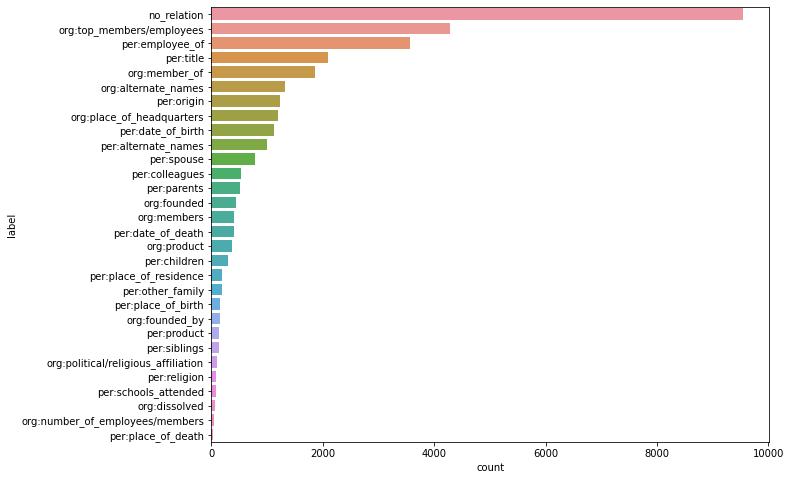

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.countplot(y='label', data=train, order = train['label'].value_counts().index)
plt.show()

# 2 train/test dataset 비교

## 2.1 source

Text(0.5, 1.0, 'test: source')

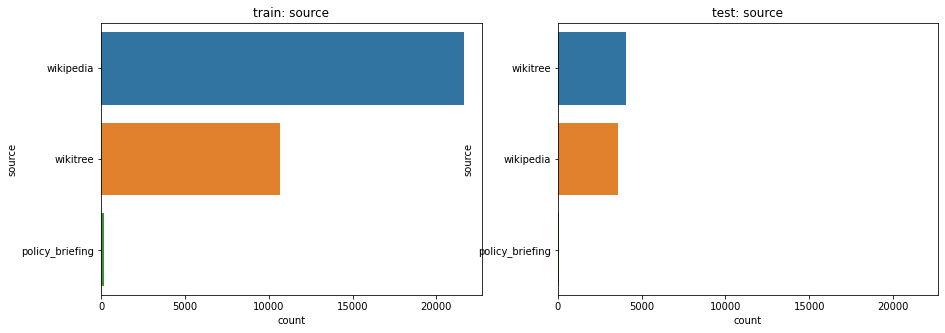

In [38]:
fig,ax = plt.subplots(ncols=2, figsize=(15,5), sharex=True)
sns.countplot(y=train['source'], ax=ax[0]).set_title("train: source")
sns.countplot(y=test['source'], ax=ax[1]).set_title("test: source")

## 2.2 subject/object entity

In [49]:
subject_entity_type = [eval(e)['type'] for e in raw_train['subject_entity']] # eval로 감싸면 dict형식의 str을 dict로 형변환할 수 있음
object_entity_type= [eval(e)['type'] for e in raw_train['object_entity']]
t_subject_entity_type = [eval(e)['type'] for e in raw_test['subject_entity']]
t_object_entity_type= [eval(e)['type'] for e in raw_test['object_entity']]

### train data

train의 object entity 에서 `NOH`의 비율이 현저히 낮아 잘 학습되지 않을 수도 있을 것이라 예상됨

Text(0.5, 1.0, 'train : object_entity')

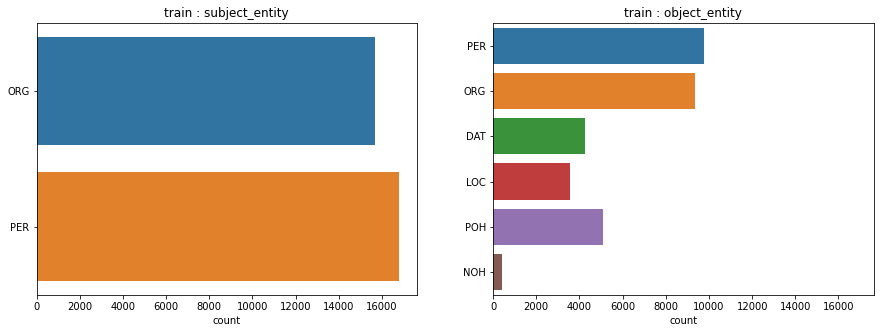

In [54]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5), sharex=True)
sns.countplot(y=subject_entity_type, ax=ax[0]).set_title("train : subject_entity")
sns.countplot(y=object_entity_type, ax=ax[1]).set_title("train : object_entity")

### test data

Text(0.5, 1.0, 'test : object_entity')

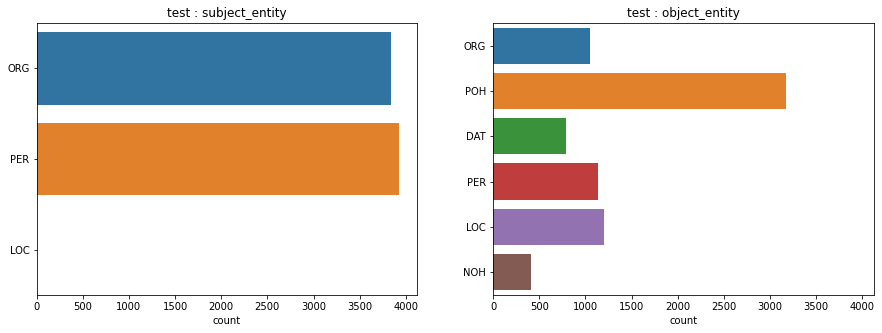

In [53]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5), sharex=True)
sns.countplot(y=t_subject_entity_type, ax=ax[0]).set_title("test : subject_entity")
sns.countplot(y=t_object_entity_type, ax=ax[1]).set_title("test : object_entity")

In [61]:
from collections import Counter
Counter(t_subject_entity_type)['LOC'] # 'test : subject_entity'의 LOC는 1개

1

## 2.3 sentence length

In [62]:
train_sentence_length = [len(e) for e in train['sentence']]
test_sentence_length = [len(e) for e in test['sentence']]

Text(0.5, 1.0, 'test : sentence_length')

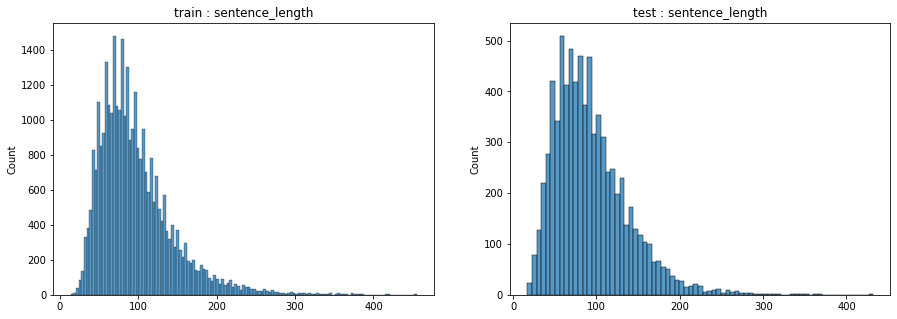

In [63]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("train : sentence_length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("test : sentence_length")

In [66]:
max(train_sentence_length) # train sentence max length

455

In [67]:
max(test_sentence_length) # test sentence max length

432

# 3. 데이터 중복 체크

In [72]:
len(train)

32470

* input이 같은 데이터는 온전히 같은 것과 레이블이 상이한 데이터까지 합쳐서 53개이다. 총 32470개 중 53개이므로 삭제하여도 그리 큰 영향이 없을 것이라 예상된다.

In [69]:
duplicated_input = train[train.duplicated(['sentence', 'subject_entity','object_entity']) == True] # input
duplicated_all = train[train.duplicated(['sentence', 'subject_entity','object_entity', 'label']) == True] # all
print(len(duplicated_input))
print(len(duplicated_all))

53
46


In [71]:
dup_sub = train[train.duplicated(['sentence', 'subject_entity']) == True] # sentence, sub
dup_ob = train[train.duplicated(['sentence', 'object_entity']) == True] # sentence, ob
dup_sentence = train[train.duplicated(['sentence']) == True] # sentence
print(len(dup_sub))
print(len(dup_ob))
print(len(dup_sentence))

1273
903
3667


* test 데이터에는 내용이 겹치는 데이터가 없음

In [86]:
test_duplicated_input = test[test.duplicated(['sentence', 'subject_entity','object_entity']) == True] # input
len(test_duplicated_input)

0

# 4. Data Cleansing

## 4.1 train data 정제

> 겹치는 데이터 삭제

In [99]:
cleaned_train = raw_train.drop(list(duplicated_input['id']))
cleaned_train.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [101]:
cleaned_train.to_csv('../dataset/train/cleaned_train.csv', index=False)

## 4.2 train data 를 train/valid data로 나누기

In [103]:
from sklearn.model_selection import train_test_split
new_train, new_dev = train_test_split(raw_train, test_size=0.2, random_state=1004, stratify=raw_train['label'])
new_train.to_csv('../dataset/train/new_train.csv', index=False)
new_dev.to_csv('../dataset/train/new_dev.csv', index=False)

# 4. 엔티티 단어 갯수, 단어별 빈도수

In [77]:
train_sub_word = pd.Series(train['subject_entity']).value_counts()
train_ob_word = pd.Series(train['object_entity']).value_counts()
print("train's subject entity word:", len(train_sub_word))
print("train's object entity word:", len(train_ob_word))
test_sub_word = pd.Series(test['subject_entity']).value_counts()
test_ob_word = pd.Series(test['object_entity']).value_counts()
print("test's subject entity word:", len(test_sub_word))
print("test's object entity word:", len(test_ob_word))

train's subject entity word: 12052
train's object entity word: 10226
test's subject entity word: 4784
test's object entity word: 4637


In [84]:
len(train['subject_entity']), len(train['object_entity']), len(test['subject_entity']), len(test['object_entity'])

(32470, 32470, 7765, 7765)

In [82]:
train_sub_word[:10]

민주당       144
화순군       107
고흥군        99
더불어민주당     92
광주광역시      92
여수시        82
문재인        80
목포시        80
영암군        75
포천시        73
Name: subject_entity, dtype: int64

In [83]:
train_ob_word[:10]

대한민국      276
자유한국당     268
더불어민주당    236
문재인       135
UEFA      117
캐나다       115
스페인       113
김대중       113
정의당       111
골키퍼       110
Name: object_entity, dtype: int64

In [80]:
test_sub_word[:10]

정부     94
군      76
김      62
시      60
A      57
경찰     46
MBC    34
이      30
육군     27
문재인    26
Name: subject_entity, dtype: int64

In [81]:
test_ob_word[:10]

관계자      76
미국       66
연구원      59
선수       55
일본       53
감독       50
코로나19    45
중국       41
의원       39
배우       39
Name: object_entity, dtype: int64